# **Image Classification using Logistic Regression in PyTorch**

## Exploring the Data

In [1]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [3]:
len(dataset)

60000

In [4]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [5]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEBB3E75470>, 5)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

##### Let's look at a couple of images from the dataset.

Label: 5


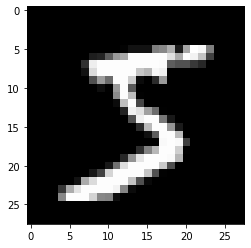

In [7]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


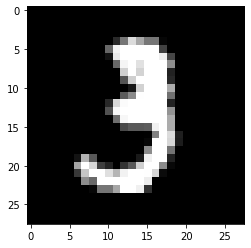

In [8]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [9]:
import torchvision.transforms as transforms

In [10]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())


In [11]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [12]:
img_tensor

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


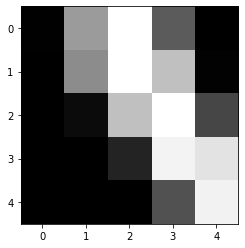

In [14]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

## Training and Validation Datasets
While building real world machine learning models, it is quite common to split the dataset into 3 parts:

1. **Training set** - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
2. **Validation set** - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
3. **Test set** - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

In [15]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

## Data Loaders

In [16]:
from torch.utils.data import DataLoader

batch_size = 128

# Data Loader
train_loader = DataLoader(
                        train_ds, 
                        batch_size, 
                        shuffle=True
                         )
val_loader = DataLoader(
                        val_ds, 
                        batch_size
                       )

## Model

In [17]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[ 0.0297,  0.0238, -0.0350,  ...,  0.0031, -0.0348, -0.0055],
        [ 0.0198, -0.0051,  0.0340,  ..., -0.0118,  0.0336, -0.0225],
        [ 0.0301, -0.0225, -0.0302,  ..., -0.0088, -0.0181,  0.0122],
        ...,
        [-0.0030,  0.0177, -0.0043,  ...,  0.0027, -0.0107,  0.0060],
        [ 0.0256, -0.0286, -0.0242,  ...,  0.0302,  0.0045, -0.0351],
        [-0.0146, -0.0030,  0.0071,  ...,  0.0046,  0.0149,  0.0085]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0300,  0.0291,  0.0344,  0.0335, -0.0259, -0.0114, -0.0002, -0.0110,
        -0.0057,  0.0206], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([0, 4, 4, 9, 0, 6, 7, 6, 4, 9, 9, 0, 7, 6, 5, 7, 4, 5, 2, 5, 1, 6, 9, 0,
        0, 7, 4, 0, 5, 7, 8, 8, 3, 6, 0, 2, 1, 2, 0, 3, 4, 2, 5, 4, 1, 7, 5, 7,
        4, 0, 7, 8, 5, 4, 3, 9, 1, 7, 2, 6, 3, 4, 6, 7, 9, 6, 6, 8, 1, 1, 9, 5,
        2, 1, 4, 4, 3, 5, 9, 1, 9, 2, 6, 9, 3, 1, 4, 1, 0, 4, 0, 6, 3, 1, 7, 1,
        7, 7, 0, 6, 3, 7, 9, 1, 8, 8, 8, 4, 5, 9, 4, 0, 2, 5, 4, 0, 4, 8, 6, 1,
        7, 6, 2, 2, 4, 5, 3, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: ignored

In [21]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [22]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0224,  0.0232,  0.0251,  ...,  0.0132,  0.0181, -0.0303],
         [ 0.0012,  0.0312, -0.0026,  ..., -0.0257,  0.0106, -0.0281],
         [ 0.0256, -0.0009,  0.0205,  ...,  0.0227,  0.0174,  0.0078],
         ...,
         [ 0.0214,  0.0346,  0.0356,  ..., -0.0340,  0.0002, -0.0308],
         [ 0.0265, -0.0108, -0.0145,  ...,  0.0307,  0.0031,  0.0181],
         [-0.0139,  0.0197,  0.0336,  ...,  0.0128,  0.0040, -0.0099]],
        requires_grad=True), Parameter containing:
 tensor([ 0.0012,  0.0278, -0.0218,  0.0132, -0.0251, -0.0263, -0.0265, -0.0124,
          0.0016,  0.0297], requires_grad=True)]

In [23]:
for images, labels in train_loader:
    print('images.shape: ', images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

images.shape:  torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.0855,  0.0609,  0.1175,  0.0755, -0.0074, -0.2973,  0.0353, -0.1751,
          0.1170, -0.2381],
        [-0.1797, -0.3342,  0.4725,  0.1743, -0.1486, -0.6228,  0.0902, -0.4038,
          0.3455, -0.3977]])


In [24]:
outputs[0]

tensor([-0.0855,  0.0609,  0.1175,  0.0755, -0.0074, -0.2973,  0.0353, -0.1751,
         0.1170, -0.2381], grad_fn=<SelectBackward>)

In [25]:
exps = torch.exp(outputs[0])
exps

tensor([0.9181, 1.0628, 1.1247, 1.0784, 0.9927, 0.7428, 1.0359, 0.8394, 1.1241,
        0.7881], grad_fn=<ExpBackward>)

In [26]:
probs = exps/torch.sum(exps)
probs

tensor([0.0946, 0.1095, 0.1159, 0.1111, 0.1023, 0.0765, 0.1067, 0.0865, 0.1158,
        0.0812], grad_fn=<DivBackward0>)

In [27]:
probs.sum()

tensor(1.0000, grad_fn=<SumBackward0>)

## Convert Output to Probability with SoftMax

In [28]:
import torch.nn.functional as F

In [29]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0946, 0.1095, 0.1159, 0.1111, 0.1023, 0.0765, 0.1067, 0.0865, 0.1158,
         0.0812],
        [0.0871, 0.0746, 0.1672, 0.1241, 0.0899, 0.0559, 0.1141, 0.0696, 0.1473,
         0.0701]])
Sum:  1.0000001192092896


In [30]:
probs.shape

torch.Size([128, 10])

In [31]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 2, 2, 8, 8, 8, 8, 2, 4, 8, 8, 9, 8, 6, 2, 9, 8, 2, 3, 8, 9, 3, 8, 8,
        2, 3, 8, 0, 4, 4, 9, 2, 2, 9, 4, 2, 8, 3, 8, 8, 2, 8, 8, 8, 2, 8, 8, 6,
        4, 8, 8, 6, 2, 2, 2, 9, 2, 9, 4, 4, 4, 8, 2, 2, 4, 4, 8, 8, 8, 8, 2, 2,
        2, 8, 8, 9, 4, 2, 8, 2, 0, 8, 3, 9, 8, 8, 9, 8, 8, 2, 9, 2, 8, 2, 8, 8,
        8, 4, 8, 3, 3, 8, 2, 8, 8, 8, 2, 9, 8, 8, 6, 8, 4, 2, 8, 8, 2, 3, 2, 8,
        9, 8, 2, 8, 8, 2, 4, 2])
tensor([0.1159, 0.1672, 0.1379, 0.1471, 0.1302, 0.1298, 0.1737, 0.1300, 0.1254,
        0.1334, 0.1310, 0.1337, 0.1328, 0.1406, 0.1459, 0.1275, 0.1406, 0.1477,
        0.1367, 0.1301, 0.1172, 0.1218, 0.1505, 0.1688, 0.1320, 0.1412, 0.1290,
        0.1252, 0.1376, 0.1334, 0.1324, 0.1399, 0.1353, 0.1193, 0.1135, 0.1503,
        0.1585, 0.1469, 0.1449, 0.1393, 0.1519, 0.1322, 0.1549, 0.1247, 0.1505,
        0.1646, 0.1283, 0.1286, 0.1292, 0.1350, 0.1615, 0.1288, 0.1461, 0.1119,
        0.1422, 0.1317, 0.1383, 0.1159, 0.1143, 0.1311, 0.1234, 0.1527, 0.1436,
       

In [32]:
labels

tensor([6, 2, 7, 2, 0, 9, 3, 4, 7, 5, 2, 9, 7, 0, 0, 7, 7, 4, 6, 0, 1, 4, 0, 2,
        9, 6, 7, 5, 9, 4, 7, 2, 5, 1, 0, 3, 0, 5, 0, 7, 7, 1, 6, 1, 3, 7, 8, 5,
        4, 1, 8, 7, 0, 5, 0, 7, 6, 2, 2, 9, 5, 8, 9, 3, 9, 4, 2, 3, 8, 2, 4, 4,
        9, 1, 1, 1, 9, 4, 7, 0, 9, 5, 6, 9, 1, 0, 9, 0, 8, 9, 4, 0, 5, 8, 3, 8,
        8, 9, 1, 4, 6, 8, 7, 0, 2, 1, 3, 8, 3, 8, 2, 2, 9, 7, 3, 1, 4, 6, 2, 5,
        2, 9, 0, 2, 2, 7, 9, 5])

## Evaluation Metric and Loss Function

In [33]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [34]:
print(outputs.shape)
print(labels.shape)

torch.Size([128, 10])
torch.Size([128])


In [35]:
accuracy(outputs, labels)

tensor(0.1406)

In [36]:
loss_fn = F.cross_entropy

In [37]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2903, grad_fn=<NllLossBackward>)


## Training the Model


```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```



In [38]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [39]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [40]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.10265031456947327, 'val_loss': 2.298564910888672}

In [41]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9371, val_acc: 0.6758
Epoch [1], val_loss: 1.6706, val_acc: 0.7505
Epoch [2], val_loss: 1.4710, val_acc: 0.7783
Epoch [3], val_loss: 1.3201, val_acc: 0.7920
Epoch [4], val_loss: 1.2041, val_acc: 0.8027


In [42]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1132, val_acc: 0.8098
Epoch [1], val_loss: 1.0401, val_acc: 0.8167
Epoch [2], val_loss: 0.9804, val_acc: 0.8214
Epoch [3], val_loss: 0.9308, val_acc: 0.8267
Epoch [4], val_loss: 0.8889, val_acc: 0.8315


In [43]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8530, val_acc: 0.8346
Epoch [1], val_loss: 0.8219, val_acc: 0.8376
Epoch [2], val_loss: 0.7948, val_acc: 0.8396
Epoch [3], val_loss: 0.7708, val_acc: 0.8429
Epoch [4], val_loss: 0.7494, val_acc: 0.8439


In [44]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7303, val_acc: 0.8456
Epoch [1], val_loss: 0.7130, val_acc: 0.8465
Epoch [2], val_loss: 0.6974, val_acc: 0.8485
Epoch [3], val_loss: 0.6831, val_acc: 0.8499
Epoch [4], val_loss: 0.6700, val_acc: 0.8510


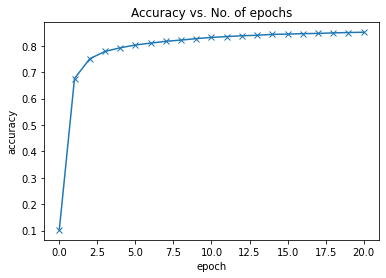

In [45]:
# Replace these values with your results
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

In [46]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


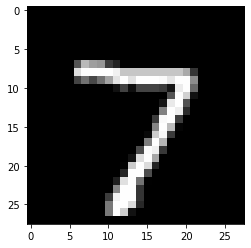

In [47]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [48]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [49]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


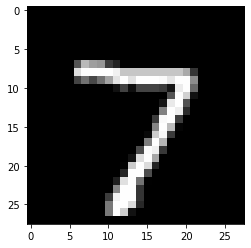

In [50]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 0


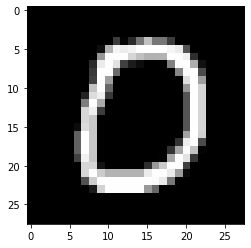

In [51]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


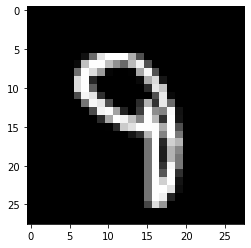

In [52]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


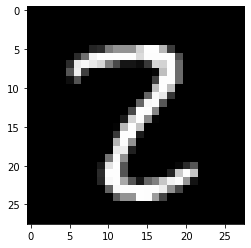

In [53]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [54]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_acc': 0.8587890863418579, 'val_loss': 0.6393176317214966}

## Saving and loading the model

In [55]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [56]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0102,  0.0190,  0.0145,  ..., -0.0224,  0.0222,  0.0193],
                      [-0.0206, -0.0277,  0.0093,  ...,  0.0195,  0.0257,  0.0146],
                      [-0.0190, -0.0078,  0.0297,  ..., -0.0138,  0.0003,  0.0134],
                      ...,
                      [-0.0140,  0.0148,  0.0293,  ..., -0.0303, -0.0219, -0.0111],
                      [-0.0106,  0.0265, -0.0270,  ...,  0.0319, -0.0321, -0.0144],
                      [ 0.0276, -0.0144, -0.0120,  ..., -0.0118,  0.0113,  0.0210]])),
             ('linear.bias',
              tensor([-0.0566,  0.0760, -0.0283, -0.0032,  0.0193,  0.0755, -0.0074,  0.0614,
                      -0.0630, -0.0427]))])

In [57]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0102,  0.0190,  0.0145,  ..., -0.0224,  0.0222,  0.0193],
                      [-0.0206, -0.0277,  0.0093,  ...,  0.0195,  0.0257,  0.0146],
                      [-0.0190, -0.0078,  0.0297,  ..., -0.0138,  0.0003,  0.0134],
                      ...,
                      [-0.0140,  0.0148,  0.0293,  ..., -0.0303, -0.0219, -0.0111],
                      [-0.0106,  0.0265, -0.0270,  ...,  0.0319, -0.0321, -0.0144],
                      [ 0.0276, -0.0144, -0.0120,  ..., -0.0118,  0.0113,  0.0210]])),
             ('linear.bias',
              tensor([-0.0566,  0.0760, -0.0283, -0.0032,  0.0193,  0.0755, -0.0074,  0.0614,
                      -0.0630, -0.0427]))])

In [58]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_acc': 0.8587890863418579, 'val_loss': 0.6393176317214966}

                                # THE END